This dataset's been downloaded from Kaggle (link: https://www.kaggle.com/cherngs/heart-disease-cleveland-uci) and the columns descriptions are as following:

There are 13 attributes


age: age in years


sex: sex (1 = male; 0 = female)

cp: chest pain type

-- Value 0: typical angina

-- Value 1: atypical angina

-- Value 2: non-anginal pain

-- Value 3: asymptomatic


trestbps: resting blood pressure (in mmHg on admission to the hospital)


chol: serum cholesterole in mg/dL


fbs: (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)


restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


thalach: maximum heart rate achieved


exang: exercise induced angina (1 = yes; 0 = no)


oldpeak = ST depression induced by exercise relative to rest


slope: the slope of the peak exercise ST segment

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping


ca: number of major vessels (0-3) colored by fluoroscopy


thal: 0 = normal; 1 = fixed defect; 2 = reversible defect


condition: 0 = no disease, 1 = disease

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)
df = pd.read_csv("I:/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Basic EDA and visualizations

In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


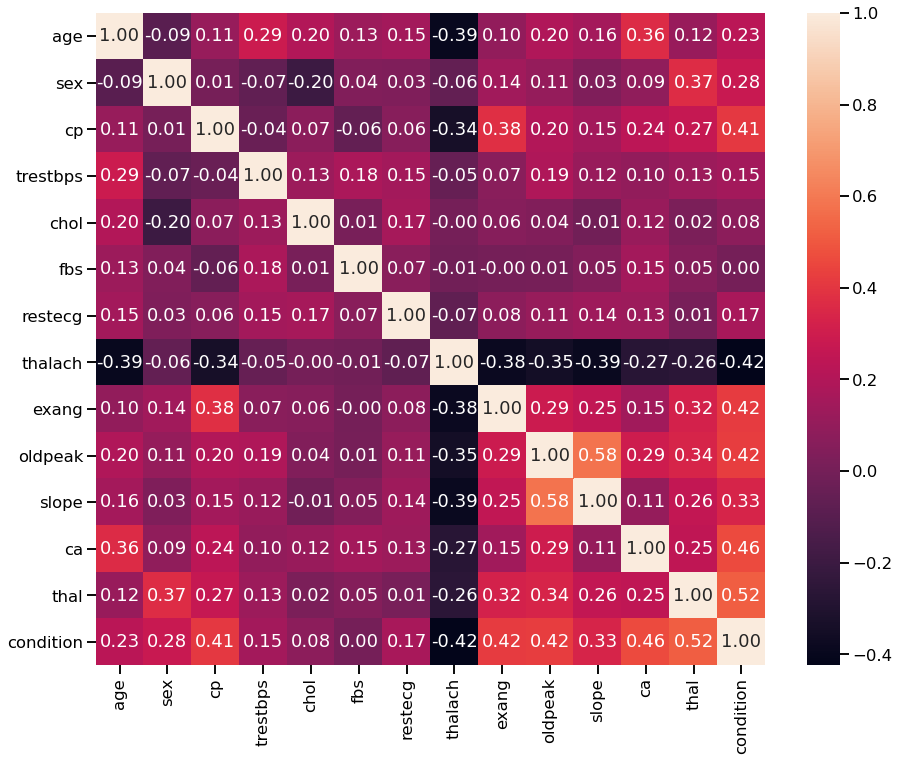

In [4]:
sns.set_context("talk")
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

The above graph is a matrix that shows the correlation of all the columns in the dataset. It's a intuitive method for visualizing the presence of linear relationships for datasets containing relatively fewer features epspecially. However it must be noted that this particular dataset is mostly made up of categorical features, therefore most of the correlation coefficients in the above graph won't make sense, especially for points that contain a non-binary categorical feature. 

In [5]:
df.groupby("condition")[["thalach","chol","age","trestbps"]].mean()

,thalach,chol,age,trestbps
condition,,,,
0,158.581250,243.493750,52.643750,129.175000
1,139.109489,251.854015,56.759124,134.635036


I selected all of the numerical columns, took their average, and grouped them by our target column, "condition". 

* It appears that the average age of the cases that present with a heart condition were ~4 years younger on average than the people who admitted without a heart disease.  

* A somewhat significant difference is apparent between the maximum heart rates of people who are sick and healthy, since healthy people were able to reach a 20 beats per minute higher maximum heart rate on average compared to those who are ill. 

* Those who weren't sick had a lower resting heart rate compared to ill people, however this difference is not that significant (especially compared to the difference between the patients' maximal heart rate) and differs merely by 6 beats per minute on average.

* Finally, people without a heart disease had a lower cholesterol count of ~8 mg/dL in their blood serum on average compared to cases that presented with a heart disease.

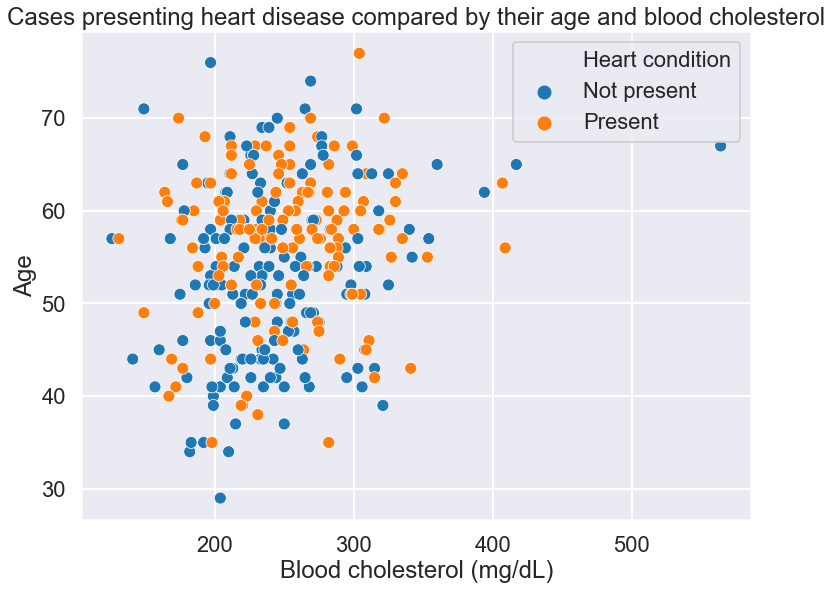

In [30]:
#I had to create a new column since Seaborn gave me some trouble with proper legend labeling, it's not essential
df["Heart condition"] = df["condition"].replace({1:"Present", 0:"Not present"})

#Part concerning the actual plotting
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("chol", "age", hue=df["Heart condition"], data=df)
plt.title("Cases presenting heart disease compared by their age and blood cholesterol")
plt.xlabel("Blood cholesterol (mg/dL)")
plt.ylabel("Age")
plt.show()

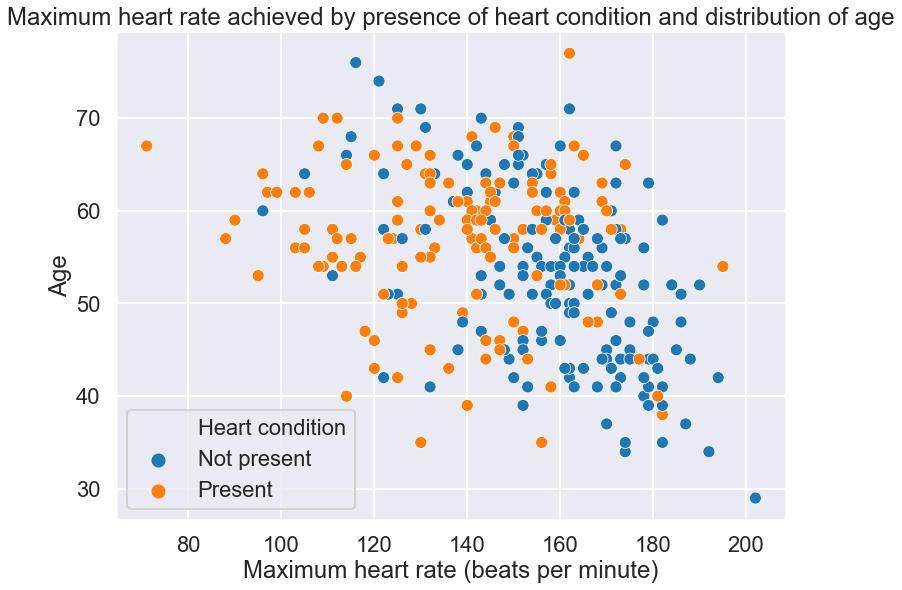

In [31]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("thalach", "age", hue=df["Heart condition"], data=df)
plt.title("Maximum heart rate achieved by presence of heart condition and distribution of age")
plt.xlabel("Maximum heart rate (beats per minute)")
plt.ylabel("Age")
plt.show()

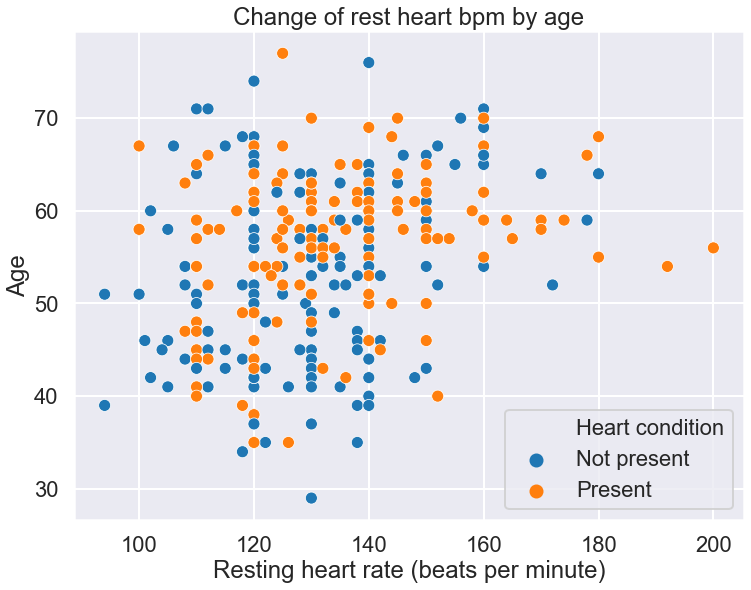

In [29]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("trestbps", "age", hue=df["Heart condition"], data=df)
plt.title("Change of rest heart bpm by age")
plt.xlabel("Resting heart rate (beats per minute)")
plt.ylabel("Age")
plt.show()

It can be seen that there's some skewing towards the right for people that do not have a heart disease, and it also seems that the maximum heart rate tends to change inversely with age.


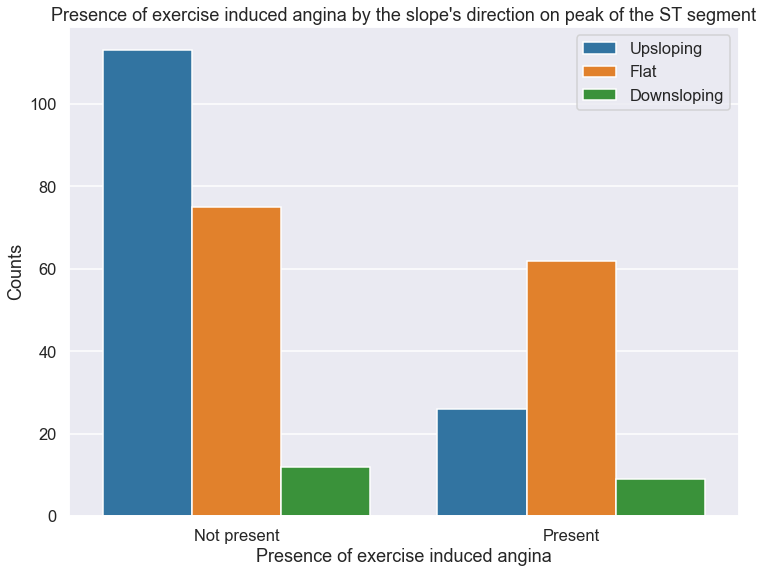

In [25]:
plt.figure(figsize=(12, 9))
g = sns.countplot("exang", hue="slope", data=df)
g.set_xticklabels(["Not present", "Present"])
plt.title("Presence of exercise induced angina by the slope's direction on peak of the ST segment")
plt.xlabel("Presence of exercise induced angina")
plt.ylabel("Counts")
plt.legend(["Upsloping", "Flat", "Downsloping"])
plt.show()

According to this (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/) article on PubMed: "...The normal ST segment during exercise therefore slopes sharply upwards..."

So simply put, the ST segment slope is expected to be upsloping for healthy individuals during effort testing.

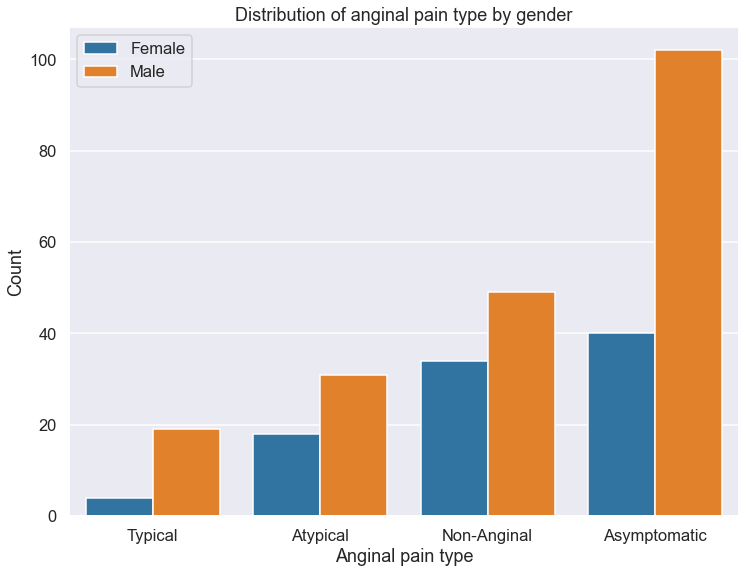

In [24]:
plt.figure(figsize=(12, 9))
g = sns.countplot("cp", hue="sex", data=df)
g.set_xticklabels(["Typical", "Atypical", "Non-Anginal", "Asymptomatic"])
plt.title("Distribution of anginal pain type by gender")
plt.xlabel("Anginal pain type")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.show()

## Encoding non-binary categorical features

In [11]:
a = pd.get_dummies(df, columns=["cp", "restecg", "slope"], prefix=["cp", "restecg", "slope"], drop_first=True)

It's important to encode the non-binary categorical features since the model will otherwise treat the numbers as weights instead of categories, and this would create the risk of our model capturing non-existent relationships between the features. I used OneHot Encoding with pandas by setting the drop_first argument to True.

In [12]:
a = a.drop("Kalp hastalığı", axis=1)

I also dropped the renamed condition column that I used for proper legend labeling above on the graphs.

In [13]:
a.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,condition,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2
0,69,1,160,234,1,131,0,0.1,1,0,0,0,0,0,0,1,1,0
1,69,0,140,239,0,151,0,1.8,2,0,0,0,0,0,0,0,0,0
2,66,0,150,226,0,114,0,2.6,0,0,0,0,0,0,0,0,0,1
3,65,1,138,282,1,174,0,1.4,1,0,1,0,0,0,0,1,1,0
4,64,1,110,211,0,144,1,1.8,0,0,0,0,0,0,0,1,1,0


## Determining feature importances

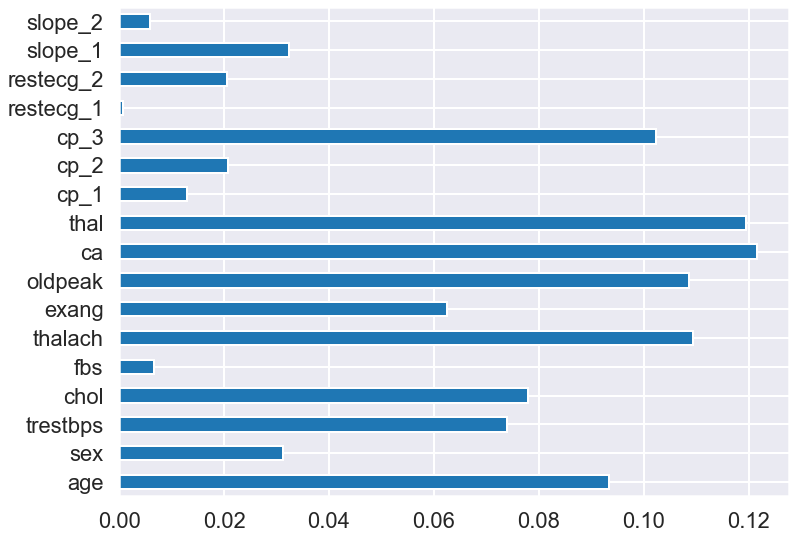

In [14]:
rf = RandomForestClassifier()
rf.fit(a.drop("condition", axis=1), a.condition)
importances = rf.feature_importances_
stuff = pd.Series(importances, index=a.drop("condition", axis=1).columns)
plt.figure(figsize=(12, 9))
stuff.plot(kind="barh")
plt.show()

I used a Random Forest Classifier in order to determine feature importances and plotted them. The "thal" column seems to be the most important feature while the model almost didn't use the "restecg_1" column in any node. 

In [15]:
X = a.drop(["condition", "restecg_1", "cp_1", "cp_2", "fbs", "slope_2", "restecg_2"], axis=1)
y = a.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc")
params = {"max_depth":np.arange(1, 13), "n_estimators":[125, 150, 175, 200], 
          "learning_rate":[0.001, 0.005, 0.01], "colsample_bytree":[0.3,0.4,0.5],
          "subsample":[0.6,0.7,0.8]
          }
grid_xgb = GridSearchCV(estimator = xgb, param_grid = params, cv=10, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
xgb_pred = grid_xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.95      0.68      0.79        28

    accuracy                           0.83        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.86      0.83      0.83        60



I dropped the target ("condition") column and all the feature columns that had a lower importance percentage than (and including) the "cp_2" column in order to reduce noise and overfitting. I used 80% of the data as a training set and the remaining 20% as a validation set and also included the stratify argument in order to make sure that both the training and validation sets have equal percentages of sick and healthy people. Finally, I plugged the model into the GridSearchCV object and tested it on a variety of hyperparameters and used a 10-fold cross validation.

## Evaluation of the model

In [16]:
print(grid_xgb.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 175, 'subsample': 0.6}


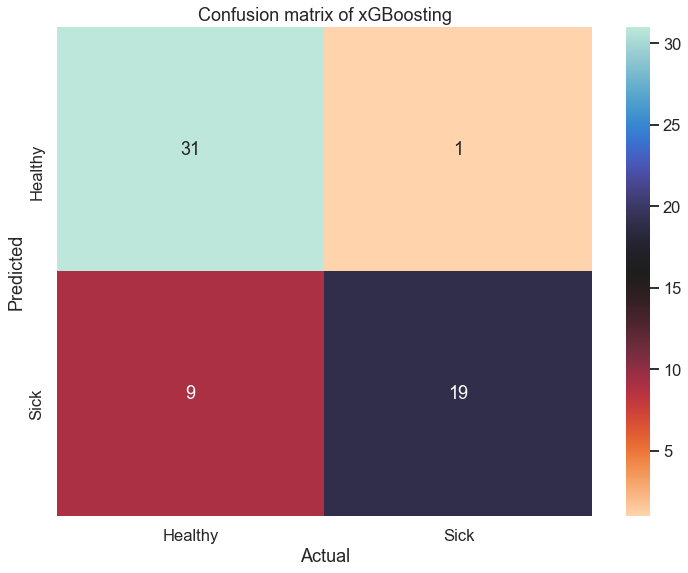

In [23]:
sns.set_context("talk")
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, xticklabels=["Healthy", "Sick"], yticklabels=["Healthy", "Sick"], fmt="g", cmap="icefire_r")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion matrix of xGBoosting")
plt.show()

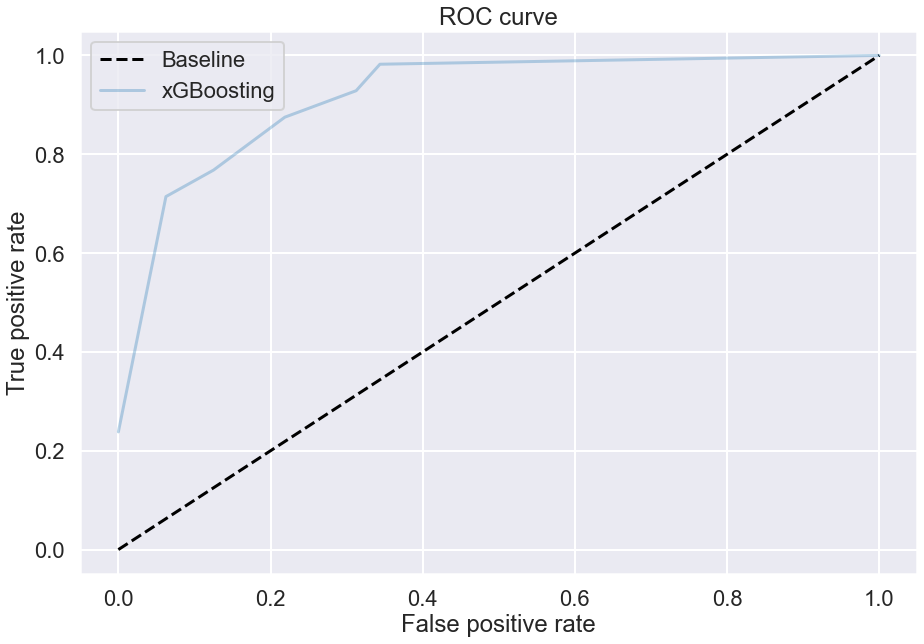

In [22]:
xgb_prob = grid_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.3, ci=None)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(["Baseline", "xGBoosting"])
plt.show()

The model seems to be especially potent at detecting healthy people, considering that only 1 person has been mislabeled as healthy despite being sick. Performance of the model does drop a considerable bit compared to predicting "healthiness" when it comes to determining whether if an individual is sick or not, however a high false positive rate could be a preferrable trade-off in order to achieve a low false negative count, considering that the priority is to ensure that the model detects as many sick people as possible. Considered that the model's recall is still in a somewhat decent range, it could be argued that this algorithm could actually be deployed and be of some use in practice.